In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
xgboost = pd.read_csv('crop_recommendation.csv')
xgboost

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [22]:
X = xgboost.drop(columns=['N' , 'P' , 'K'], axis=1, inplace=True)


In [23]:
label_encoder = preprocessing.LabelEncoder()
xgboost['label'] = label_encoder.fit_transform(xgboost['label'])
xgboost

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,20
1,21.770462,80.319644,7.038096,226.655537,20
2,23.004459,82.320763,7.840207,263.964248,20
3,26.491096,80.158363,6.980401,242.864034,20
4,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,5
2196,27.417112,56.636362,6.086922,127.924610,5
2197,24.131797,67.225123,6.362608,173.322839,5
2198,26.272418,52.127394,6.758793,127.175293,5


In [24]:
# Split the data into training and testing sets
X = xgboost.drop('label', axis=1)  # Features
y = xgboost['label']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1760, 4)
X_test shape: (440, 4)
y_train shape: (1760,)
y_test shape: (440,)


In [26]:
# Initialize the XGBoost model
model_xg = xgb.XGBClassifier(
    objective='multi:softmax',  # For multi-class classification
    num_class=len(xgboost['label'].unique()),  # Number of classes in the target variable
    random_state=42
)

# Train the model
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=22,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [27]:
# Make predictions
y_pred = model_xg.predict(X_test)


# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9636363636363636


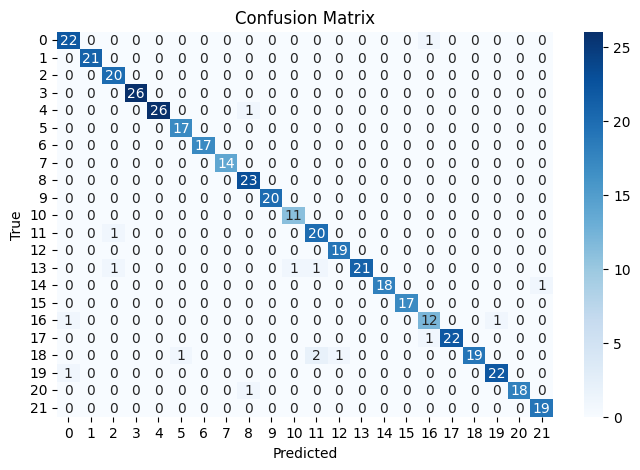

In [28]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=model_xg.classes_)

# Display the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_xg.classes_, yticklabels=model_xg.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()